### Task # 2 - To Explore Supervised Machine Learning
#### This is a simple linear regression task as it involves just two variables. In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
#### Given Problem Statement - What will be predicted score if a student study for 9.25 hrs in a day?

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Data from given link
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

##### In this Data we are given with just 2 Features. First one is the total number of hours a student have studied and second feature is the percentage of marks they got based on the number of hours they studied. The given data is for total of 25 students. As our target variable is Scores which is continuous variable so, this is Regression Problem. Here, we will predict the percentge of marks that a student is expected to score based on the number of hours they have studied.

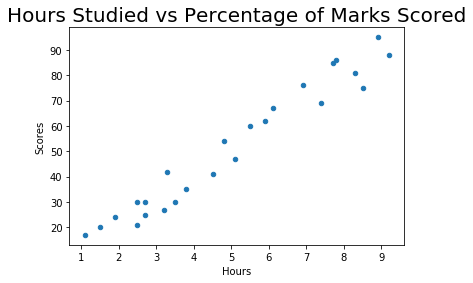

In [4]:
df.plot.scatter(x = 'Hours', y = 'Scores')
plt.title('Hours Studied vs Percentage of Marks Scored', fontsize = 20)
plt.show()

##### From the scatter plot above we can observe that all the data points are moving upward i.e. with increase in hours studied the score is also incresing. Also, we can see that all these data points seems to lie on the same straight line.

### Building Linear Regression Model (Stats)

In [5]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [6]:
X = df.drop('Scores', axis = 1)
y = df['Scores']

In [7]:
Xc = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size = 0.3, random_state = 0)

In [8]:
lin_reg = sm.OLS(y_train, X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     276.3
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           4.52e-11
Time:                        12:56:42   Log-Likelihood:                -53.493
No. Observations:                  17   AIC:                             111.0
Df Residuals:                      15   BIC:                             112.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3708      3.481      0.681      0.506      -5.048       9.790
Hours          9.7886      0.589     16.621      0.000       8.533      11.044
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.510
Skew:                          -0.211   Prob(JB):                        0.470
Kurtosis:                       1.602   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
y_pred = lin_reg.predict(X_test)
r2_score(y_test, y_pred)

0.9568211104435258

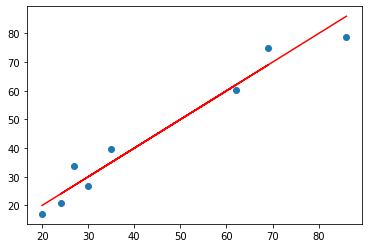

In [10]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')
plt.show()

###### We got higher r2_score. So, we can see all points are on same line.

### Building Linear Regression (ML)

In [11]:
X = df.drop('Scores', axis = 1)
y = df['Scores']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.9484997422695115
R^2 score for test: 0.9568211104435257


###### Based on the R2 obtained in the model, the performance is similar for train and test. So there might not be an overfitting problem.

In [15]:
y_pred = lr.predict(X_test)

In [16]:
r2_score(y_test, y_pred)

0.9568211104435257

In [17]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


##### Prediction of score if a student study for 9.25 hrs in a day

In [18]:
pred_score = lr.predict([[9.25]])
print('Hours :', 9.25)
print('Score :', pred_score)

Hours : 9.25
Score : [92.91505723]


### So, If a student studies 9.25 hrs in a day then he/she will score 92.9 % as predicted by our Linear Model.

### As we saw above both Ordinal Least Square(OLS) model or also we can say stats model and Linear Regression Model performed same.  As, we can see the R2 Score for both models is same.